In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sns

import scipy 
from scipy.stats import spearmanr
from scipy.stats import pearsonr
%matplotlib inline

# The Pearson Correlation

# zero correlation

generate random number

In [23]:
np.random.seed(1)
data1 = np.random.randn(1000)*100+1
data2 = np.random.randn(1000)*100+1


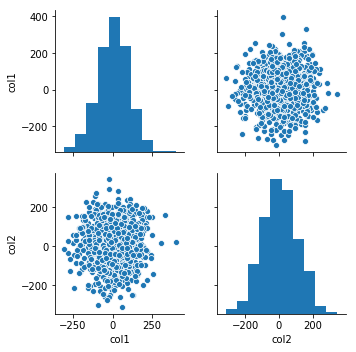

In [24]:
d={'col1':data1, 'col2':data2}
data = pd.DataFrame(d)
sns.pairplot(data)

In [25]:
covariance = np.cov(data1,data2)
print(covariance)

[[ 9633.32443235   221.07922542]
 [  221.07922542 10620.3914267 ]]


In [26]:
corr,_ = pearsonr(data1,data2)
print('Pearson correlation:%0.3f' % corr)

Pearson correlation:0.022


# positive correlation

In [27]:
wh = pd.read_csv('weight-height.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [28]:
wh.cov()

,Height,Weight
Height,14.803473,114.242656
Weight,114.242656,1030.951855


In [29]:
wh.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [30]:
wh.corr(method='pearson')

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


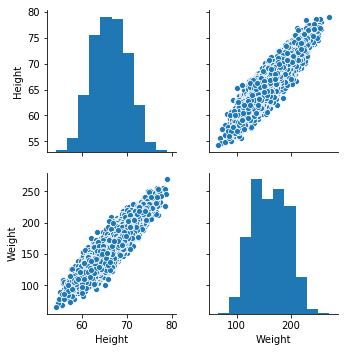

In [31]:
sns.pairplot(wh)

In [32]:
wh.shape

(10000, 3)

In [33]:
weight=wh['Weight']
height=wh['Height']
pearsonr_coeffient,p_value=pearsonr(weight,height)
print('PearsonR correlation coefficient %0.3f'%(pearsonr_coeffient))


PearsonR correlation coefficient 0.925


# Correlation Aboard the Titanic 

Now what are some correlations we might look for?

Is there a correlation between age and fare price?
Is there a correlation between class and survival? Did rich people survive more than the working people?
Was there a correlation between age and survival? Did they really allow "women and children first"?
What about the passenger's sex and survival?

In [34]:
titanic = pd.read_csv('titanic_train.csv')
titanic.columns={'PanssengerID','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'}
titanic.head()

,PanssengerID,Parch,Fare,Pclass,Embarked,Sex,Age,Name,Survived,Ticket,SibSp,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic.corr()

,PanssengerID,Parch,Fare,Sex,Age,Name,Ticket
PanssengerID,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Parch,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Fare,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Sex,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
Age,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Name,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Ticket,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


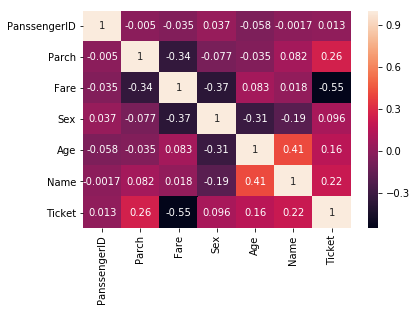

In [36]:
sns.heatmap(titanic.corr(),annot=True)

In [37]:
cars = pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


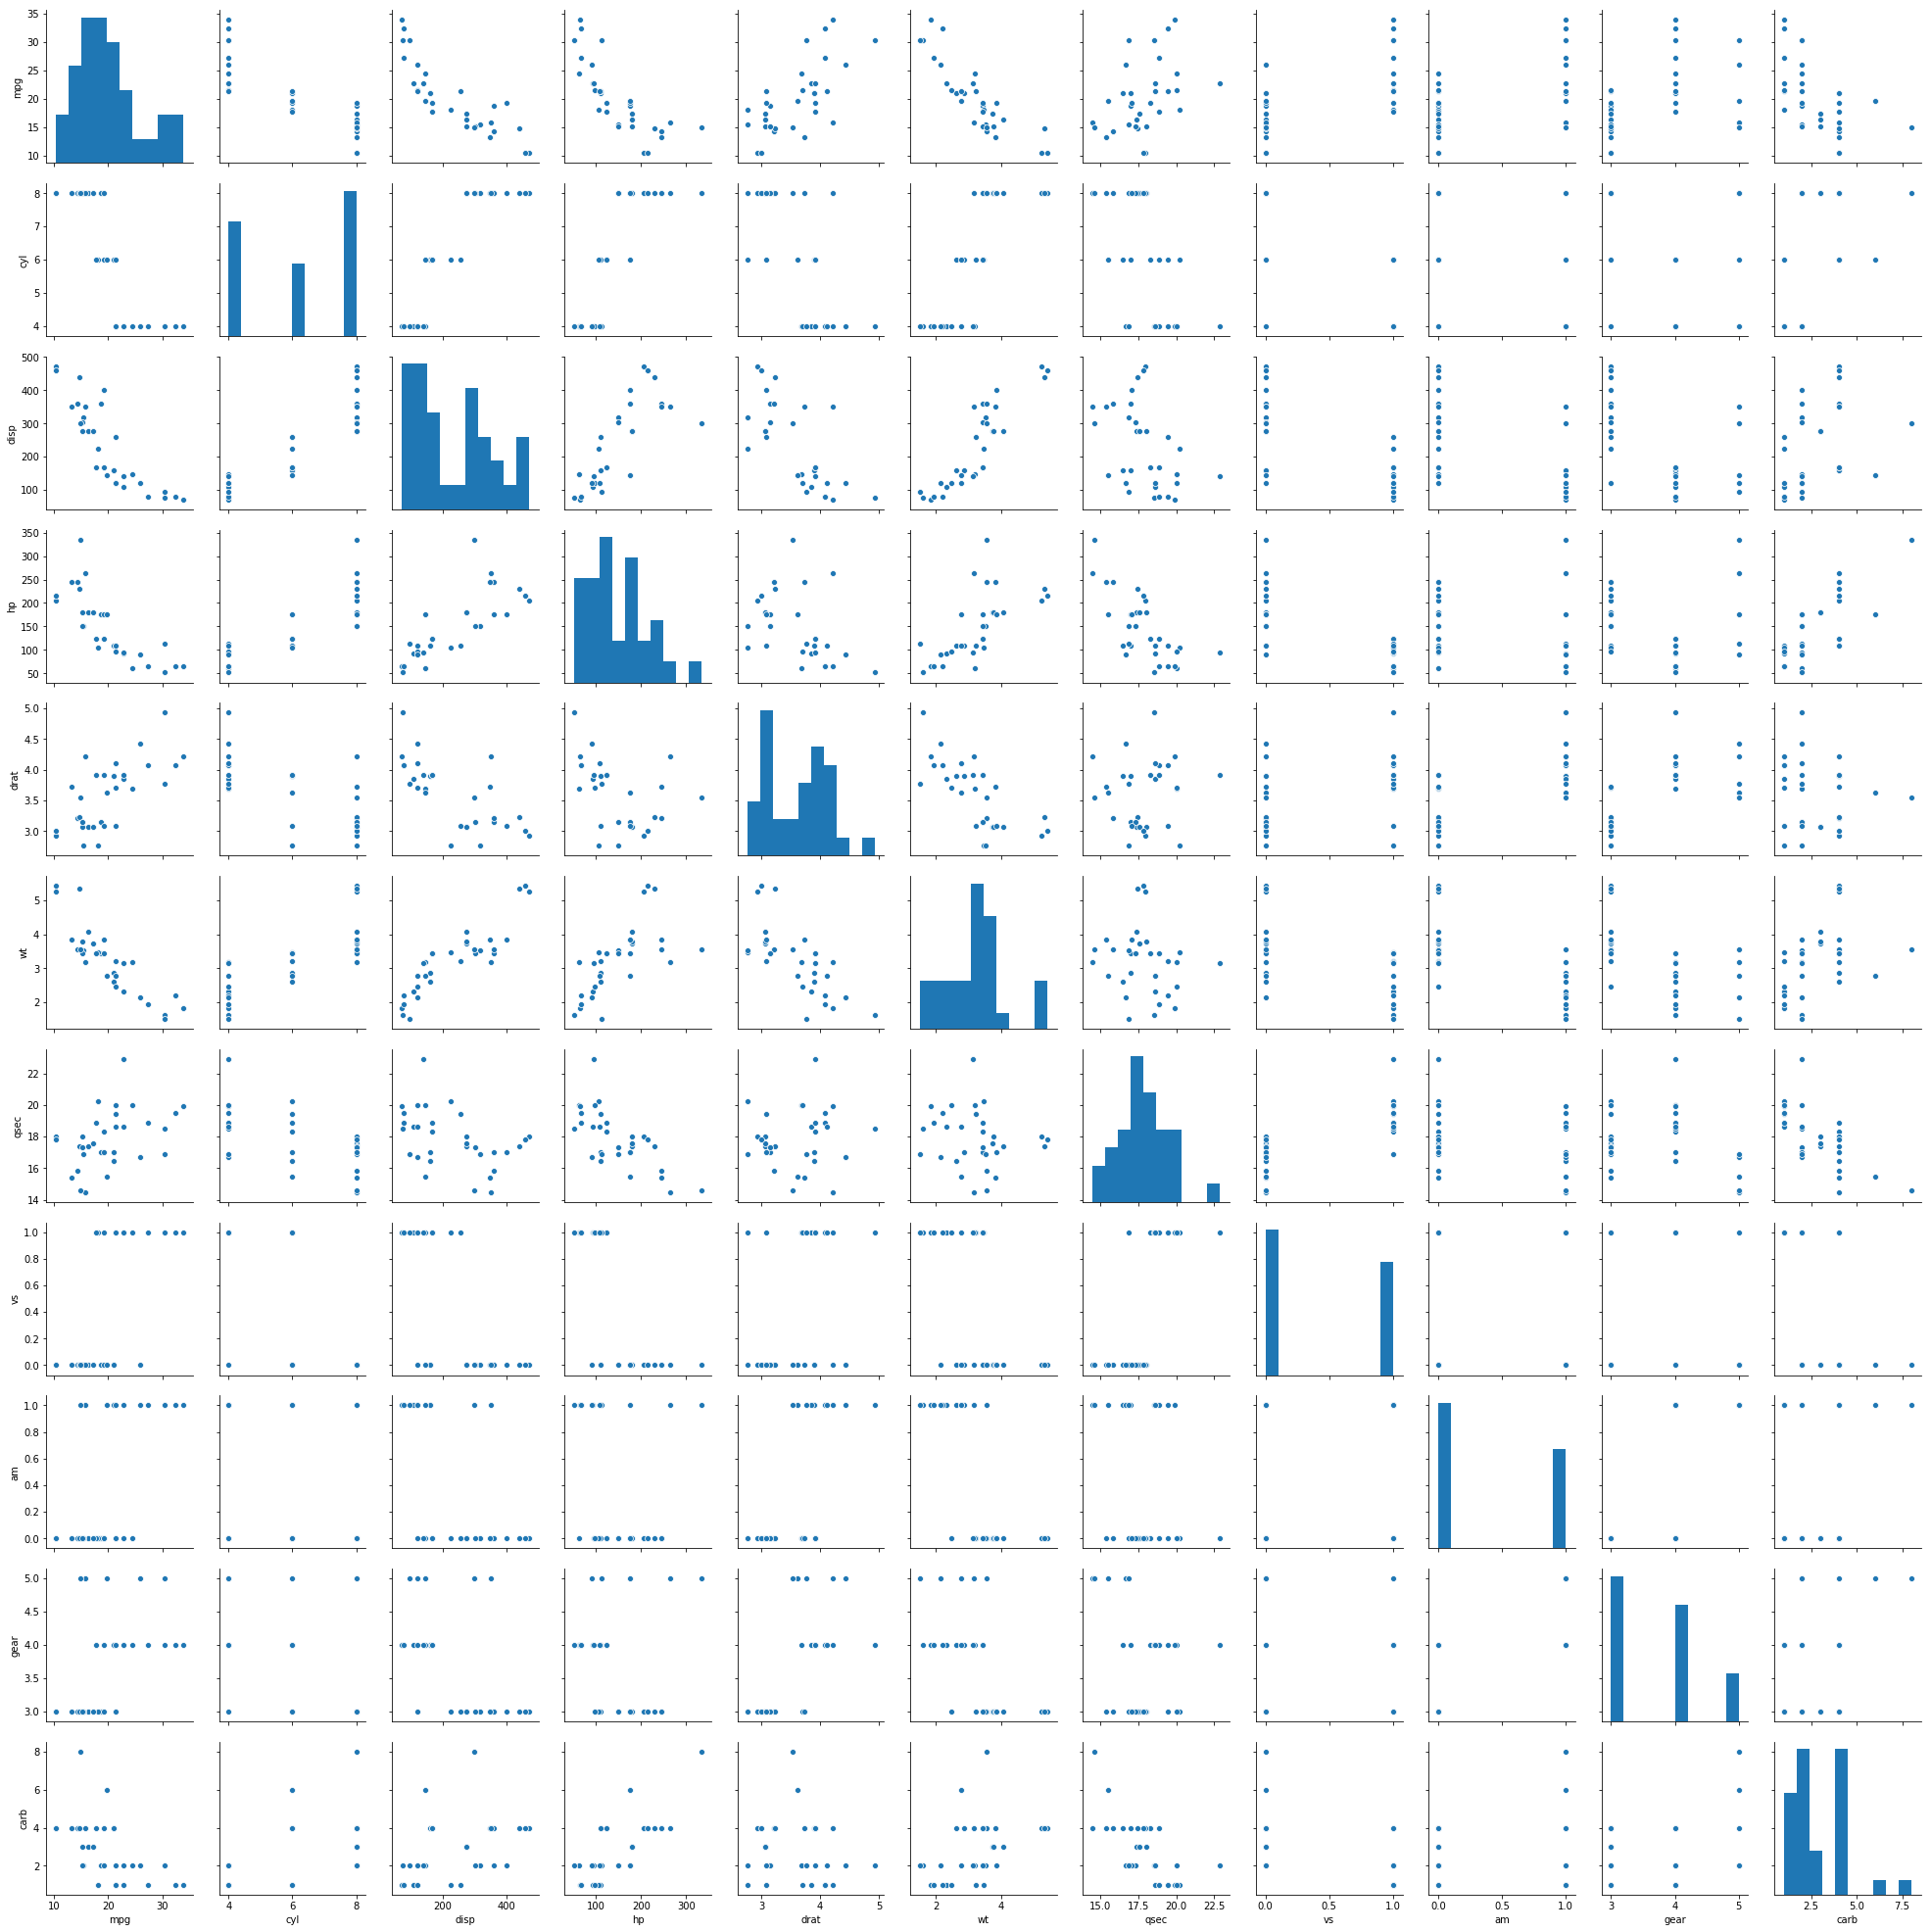

In [38]:
sns.pairplot(cars)

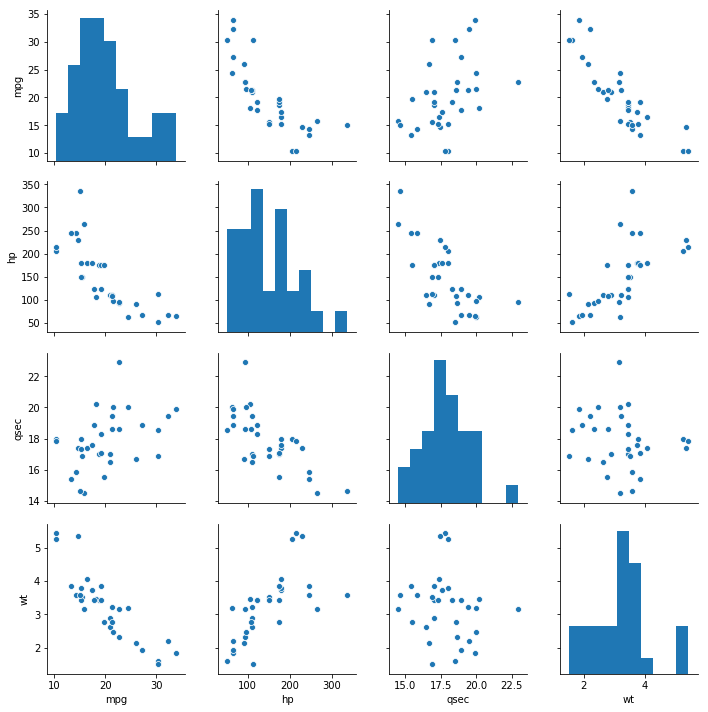

In [39]:
X = cars[['mpg','hp','qsec','wt']]
sns.pairplot(X)

Satisfies Assumptions
1. Normally distributed 正态分布
2. Linearly related 线性相关
3. Continuous numeric variable 连续数值型变量


In [40]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coeffient,p_value=pearsonr(mpg,hp)
print('PearsonR correlation coefficient %0.3f'%(pearsonr_coeffient))


PearsonR correlation coefficient -0.776


In [ ]:
pearsonr_coeffient,p_value=pearsonr(mpg,qsec)
print('PearsonR correlation coefficient %0.3f'%(pearsonr_coeffient))


In [41]:
pearsonr_coeffient,p_value=pearsonr(mpg,wt)
print('PearsonR correlation coefficient %0.3f'%(pearsonr_coeffient))


PearsonR correlation coefficient -0.868


In [42]:
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


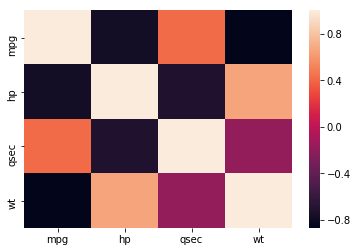

In [43]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

# Spearman correlation

In [ ]:
rcParams['figure.figsize']=5,4
sns.set_style('whitegrid')

In [ ]:
cars = pd.read_csv('mtcars.csv')
cars.columns={'car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb'}
cars.head()

In [ ]:
sns.pairplot(cars)

In [ ]:
X = cars[['cyl','vs','am','gear']]
sns.pairplot(X)

In [ ]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl,vs)
print('Sperman Rank correlation coefficient %0.3f'%(spearmanr_coefficient))

In [ ]:
spearmanr_coefficient, p_value = spearmanr(cyl,am)
print('Sperman Rank correlation coefficient %0.3f'%(spearmanr_coefficient))

In [ ]:
spearmanr_coefficient, p_value = spearmanr(cyl,gear)
print('Sperman Rank correlation coefficient %0.3f'%(spearmanr_coefficient))

Chi-square test for independence

In [ ]:
table =pd.crosstab(cyl,am)
from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f'%(chi2,p))